<a href="https://colab.research.google.com/github/elfavci/EE-WARN/blob/main/ProjeGMKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.datasets import fetch_openml
from skimage.filters import threshold_otsu
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10 #veri kümesi
from sklearn.model_selection import train_test_split  #veri kümesini böler
from tensorflow.keras.models import Sequential #yapay sinir ağı modeli
#giriş katmanından başlayarak sıralı olarak birbirini takip eden katmanlar eklenir ve çıktı katmanına kadar devam eder.
from tensorflow.keras.layers import Conv2D #2 boyutlu veriler üzerine evrişim işlemi gerçekleştirilir.
from tensorflow.keras.layers import MaxPooling2D #önemli özellikleri korumak için kullanılır.
from tensorflow.keras.layers import Flatten #tek boyutlu veriye dönüştürür
from tensorflow.keras.layers import Dense #full connected bağlantıları temsil eder.

#çıktı aktivasyon fonksinumuz.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [4]:
# Görüntüleri düzleştirerek her bir görüntüyü bir örnek olarak düşünün
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

# Hedef değişkenleri ravel() fonksiyonuyla yeniden şekillendirin
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

# Random Forest sınıflandırıcıyı oluşturun
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Sınıflandırıcıyı eğitin
rf_classifier.fit(X_train_flat, y_train_flat)
# F1 skorunu elde edin ve yazdırın
y_pred = rf_classifier.predict(X_test_flat)

# Modeli değerlendirin
f1 = f1_score(y_test_flat, y_pred, average='weighted')
print("F1 skoru : ", f1)

accuracy = accuracy_score(y_test_flat, y_pred)
print("accuracy : ", accuracy)

F1 skoru :  0.462062096809522
accuracy :  0.4654


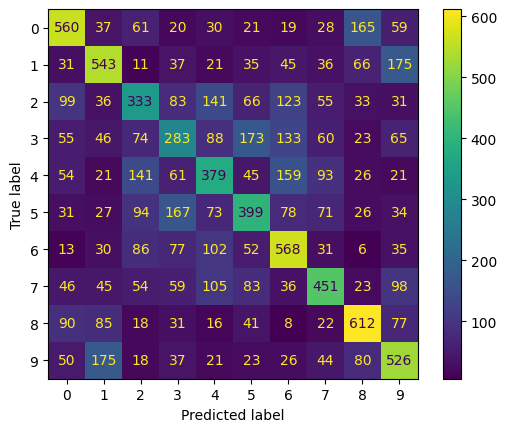

In [5]:
# Confusion Matrix'i elde edin ve yazdırın
cm = confusion_matrix(y_test_flat, y_pred,labels=rf_classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [6]:
from skimage.color import rgb2gray
# Görüntüleri 0-1 aralığına getirerek normalizasyon yapalım
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Renkli görüntüleri siyah-beyaz (grayscale) dönüştürelim
X_train_gray = np.array([rgb2gray(image) for image in x_train])
X_test_gray = np.array([rgb2gray(image) for image in x_test])

# Verileri işlenmiş hale getirme
X_train_clean = []
X_test_clean = []

for image in X_train_gray:
    # Görüntüleri siyah-beyaz yaparak tek bir renk tonlamasına dönüştürelim
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Dümdüz hale getirilmiş görüntüleri X_train_clean listesine ekle
    X_train_clean.append(binary_image.flatten())

for image in X_test_gray:
    # Görüntüleri siyah-beyaz yaparak tek bir renk tonlamasına dönüştür
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Dümdüz hale getirilmiş görüntüleri X_test_clean listesine ekle
    X_test_clean.append(binary_image.flatten())

X_train_clean = np.array(X_train_clean)
X_test_clean = np.array(X_test_clean)

# Hedef değişkenleri ravel() fonksiyonuyla yeniden şekillendirme
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

# Random Forest sınıflandırıcıyı oluştur
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Sınıflandırıcıyı eğit
rf_classifier.fit(X_train_clean, y_train_flat)

# Modeli değerlendir
y_pred = rf_classifier.predict(X_test_clean)
accuracy = accuracy_score(y_test_flat, y_pred)
print("accuracy : ", accuracy)
# Modeli değerlendir
f1 = f1_score(y_test_flat, y_pred, average='weighted')
print("F1 skoru : ", f1)


accuracy :  0.3735
F1 skoru :  0.3706022804916992


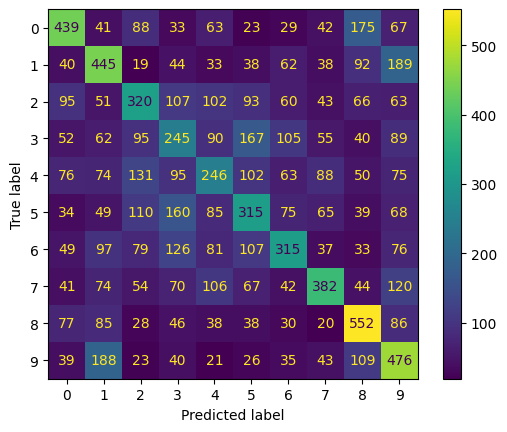

In [7]:
# Confusion Matrix'i elde edin ve yazdırın
cm = confusion_matrix(y_test_flat, y_pred,labels=rf_classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()